Let's start by importing the necessary modules. Our usual suspects so far are `numpy`, `os`,  and `pandas` of course. But we'll also be importing `pyplot` from `matplotlib` and we'll proceed to configure it right away so our graphics show up nicely:

# Introduction to Data Analysis with Python II


<img src="https://www.python.org/static/img/python-logo.png" style="width: 200px; float: right;"/>

## Data Wrangling: Clean, Transform, Merge, Reshape

In [8]:
import numpy as np
#import os ---> SOLO NECESARIO EN COLAB
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd

%matplotlib inline

## Combining and merging data sets

### Database-style DataFrame merges

Let's create a couple of quick dataframes from a dictionary as input to illustrate merges:

In [9]:
df1 = pd.DataFrame({
  'data1' : range(7),
  'key' : list('bbacaab')
})
df2 = pd.DataFrame({
  'data2' : range(20,23),
  'key' : list('abd')
})

Everything looks as expected:

In [10]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [11]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


Let's talk about merge.

By default, .merge() performs an [inner join](https://www.w3schools.com/sql/sql_join.asp) between the DataFrames, using the common columns as keys. In a database, inner join operation returns recors that have matching values in both tables:

![Inner Join](https://drive.google.com/uc?export=view&id=1ONVclC3ZQbsblQG8zwutQZB3JuE6AKF3)

Even better, using a diagram that approaches a bit more the representation of a dataframe, the merge operation would be like this:

<div>
<img src="https://i.stack.imgur.com/YvuOa.png" alt="Better Inner Join" width="300"/>
</div>

In our case, we're talking about merging elements on the basis of the `key` column. So merging `df1` on `df2` we'll yield a new dataframe based on the `df1` column structure with an additional `data2` column having the row value coming from `df2` corresponding to the values present in `key` in both merged datasets:

In [12]:
df1.merge(df2)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


In [13]:
#The result is equal, but differently sorted
df2.merge(df1)

,data2,key,data1
0,20,a,2
1,20,a,4
2,20,a,5
3,21,b,0
4,21,b,1
5,21,b,6


Reminder: we're not modifying `df1` when invoking `merge()` on it, we're being handed a copy instead:

In [14]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


Inner merge implies that the cartesian product of the elements with common keys is returned. That is, if there are duplicates, it will return all the possible combinations.

In set theory, the cartesian product concept is easy. The cartesian product of sets $A$ and $B$ is $A \times B$, as shown in the image:

![Cartesian product of two sets](https://drive.google.com/uc?export=view&id=18ejPhzu4HQMgBl5omgfAYt67pGSTMa38)

To see what this yields for our dataframes merging we need to create first a new dataframe with **duplicate** `key` entries:

In [15]:
df2_wdups = pd.DataFrame({
    'data2' : range(20,24),
    'key' : list('abda')
    })
df2_wdups

,data2,key
0,20,a
1,21,b
2,22,d
3,23,a


When merging `df1` with `df2_wdups` we can see that the cartesian product for the set containing the duplicate elements for a given key is there, as for example is the case for $(a)$ and values $(20,23)$:

In [16]:
df1.merge(df2_wdups)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,2,a,23
5,4,a,20
6,4,a,23
7,5,a,20
8,5,a,23


So, the cartesian products shown here for the key `a` are the corresponding to a matrix of ([2,4,5]x[20,23]).

If the columns to join on don't have the same name, or we want to join on the index of the DataFrames, we'll need to make it explicit. Let's create a couple of new datasets to show this:

In [17]:
df3 = pd.DataFrame({
    'data1' : range(7),
    'lkey' : list('bbacaab')
    })
df4 = pd.DataFrame({
    'data2' : range(3),
    'rkey' : list('abd')
    })

In [18]:
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [19]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [20]:
df3.merge(df4,
          left_on='lkey',
          right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


Why are we naming left and right in this operation? Think about what we saw about merge being an implementation of a SQL JOIN operation.

Do you think order matters in these operations? Generally speaking, it does, because the cartesian product is **not** commutative. The same applies for the JOIN operation that merge is doing, with the exception of the inner join where we can see the commutative property taking place:

In [21]:
df4.merge(
    df3,left_on='rkey',
    right_on='lkey')

,data2,rkey,data1,lkey
0,0,a,2,a
1,0,a,4,a
2,0,a,5,a
3,1,b,0,b
4,1,b,1,b
5,1,b,6,b


You can see, however, that changing the order of the elements of the operation does change the ordering of the result.

Let's try now an outer JOIN, that corresponds in set theory to this operation:

![full outer join](https://www.w3schools.com/sql/img_fulljoin.gif)

Or, again, using a more dataframe-oriented representation:

<div>
<img src="https://i.stack.imgur.com/euLoe.png" alt="Better Full Outer Join" width="300"/>
</div>

In [22]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [23]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


In [24]:
df1.merge(df2, how='outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,4.0,a,20.0
5,5.0,a,20.0
6,3.0,c,NaN
7,NaN,d,22.0


That was easy according to the set theory diagram (and should be commutative as well), as we didn't have any duplicates in df2. What if we do?:

In [25]:
df2_wdups

,data2,key
0,20,a
1,21,b
2,22,d
3,23,a


As expected, we'll get the cartesian product:

In [26]:
df1.merge(df2_wdups, how='outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,2.0,a,23.0
5,4.0,a,20.0
6,4.0,a,23.0
7,5.0,a,20.0
8,5.0,a,23.0
9,3.0,c,NaN


We can do a left join as well, which returns all the rows from the left dataframe (`df1`) and the matched rows of the right dataframe (`df2`):

![left join](https://www.w3schools.com/sql/img_leftjoin.gif)

Or, once again:

<div>
<img src="https://i.stack.imgur.com/BECid.png" alt="Better Full Left Outer Join" width="300"/>
</div>

In [27]:
df1.merge(df2, how='left')

,data1,key,data2
0,0,b,21.0
1,1,b,21.0
2,2,a,20.0
3,3,c,NaN
4,4,a,20.0
5,5,a,20.0
6,6,b,21.0


You can see that for existing keys in `df1` that are non existent in `df2` (as is the case of `c`) Pandas will fill the corresponding column (`data2`) with `NaN`.

If there are two columns with the same name that we do not join on, both will get transferred to the resulting DataFrame with a suffix.

Let's modify our dataframes `df1` and `df2` so they both have an extra column with the same name:

In [28]:
df1['X'] = 2
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [29]:
df2['X'] = 42
df2

,data2,key,X
0,20,a,42
1,21,b,42
2,22,d,42


...and proceed to do an inner join on the column `key`:

In [30]:
df1.merge(df2, on='key')

,data1,key,X_x,data2,X_y
0,0,b,2,21,42
1,1,b,2,21,42
2,6,b,2,21,42
3,2,a,2,20,42
4,4,a,2,20,42
5,5,a,2,20,42


We see the default naming convention assigns `x` and `y`. We can modify that by being explicit about suffixes:

In [31]:
df1.merge(df2, on='key', suffixes=['_left', '_right'])

,data1,key,X_left,data2,X_right
0,0,b,2,21,42
1,1,b,2,21,42
2,6,b,2,21,42
3,2,a,2,20,42
4,4,a,2,20,42
5,5,a,2,20,42


### Merging on index

So far, we didn't explicitly define an index for our dataframes nor used it for our merging operations. Let's do it, creating a new `df5` for our practice first:

In [32]:
df5= pd.DataFrame({
    'g': range(4),
    'h': range(8,12)
    },
    index =list('abcd'))
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


Our `df1` was:

In [33]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


Let's do an inner join where we explicitly mark the index to use in the right set as the dataframe index (option `right_index=True`) 

In [34]:
df1.merge(df5, left_on='key', right_index=True)

,data1,key,X,g,h
0,0,b,2,1,9
1,1,b,2,1,9
6,6,b,2,1,9
2,2,a,2,0,8
4,4,a,2,0,8
5,5,a,2,0,8
3,3,c,2,2,10


In [35]:
df1.merge(df5, left_on='key', right_index=True).sort_index()

,data1,key,X,g,h
0,0,b,2,1,9
1,1,b,2,1,9
2,2,a,2,0,8
3,3,c,2,2,10
4,4,a,2,0,8
5,5,a,2,0,8
6,6,b,2,1,9


In [36]:
df1.merge(df5, left_on='key', right_index=True).columns.to_list()

['data1', 'key', 'X', 'g', 'h']

In [37]:
df5.merge(df1, right_on='key', left_index=True)

,g,h,data1,key,X
2,0,8,2,a,2
4,0,8,4,a,2
5,0,8,5,a,2
0,1,9,0,b,2
1,1,9,1,b,2
6,1,9,6,b,2
3,2,10,3,c,2


In [38]:
df5.merge(df1, right_on='key', left_index=True).sort_index().loc[:,['data1', 'key', 'X', 'g', 'h']]

,data1,key,X,g,h
0,0,b,2,1,9
1,1,b,2,1,9
2,2,a,2,0,8
3,3,c,2,2,10
4,4,a,2,0,8
5,5,a,2,0,8
6,6,b,2,1,9


### Concatenating along an axis

We all know merging and concat is **not** the same, but let's make it graphically clear:

Merging a dataframe:

![merge](https://miro.medium.com/max/1400/1*-uSHoxrzM57syqnKnms2iA.png)

Concatenating a dataframe on two different axes:
![concat](https://miro.medium.com/max/1400/1*0wu6DunCzPC4o9FIyRTW4w.png)

Now that we cleared that out, we can start practicing with dataframes concatenation:

In [39]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [40]:
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


In [48]:
pd.concat([df1, df5])

,data1,key,X,g,h
0,0.0,b,2.0,NaN,NaN
1,1.0,b,2.0,NaN,NaN
2,2.0,a,2.0,NaN,NaN
3,3.0,c,2.0,NaN,NaN
4,4.0,a,2.0,NaN,NaN
5,5.0,a,2.0,NaN,NaN
6,6.0,b,2.0,NaN,NaN
a,NaN,NaN,NaN,0.0,8.0
b,NaN,NaN,NaN,1.0,9.0
c,NaN,NaN,NaN,2.0,10.0


Remember that our default axis is axis 0 (operating by rows), and that was that happened here, where Pandas filled in with `NaN` the values it didn't have.

In [42]:
import numpy as np

a1 = np.arange(0,24).reshape(4,6)
a1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [43]:
a2 = np.arange(25,37).reshape(4,3)
a2

array([[25, 26, 27],
       [28, 29, 30],
       [31, 32, 33],
       [34, 35, 36]])

In [46]:
a3 = np.concatenate([a1,a2], axis=1)
a3

array([[ 0,  1,  2,  3,  4,  5, 25, 26, 27],
       [ 6,  7,  8,  9, 10, 11, 28, 29, 30],
       [12, 13, 14, 15, 16, 17, 31, 32, 33],
       [18, 19, 20, 21, 22, 23, 34, 35, 36]])

In [49]:
s1 = pd.Series(range(4), index=list('abcd'))
s2 = pd.Series(range(10,13), index=list('lmn'))
s3 = pd.Series(range(40,43), index=list('xyz'))
print(f'{s1},{s2},{s3}')

a    0
b    1
c    2
d    3
dtype: int64,l    10
m    11
n    12
dtype: int64,x    40
y    41
z    42
dtype: int64


In [50]:
pd.concat([s1,s2,s3])

a     0
b     1
c     2
d     3
l    10
m    11
n    12
x    40
y    41
z    42
dtype: int64

In [51]:
result = pd.concat([s1,s2,s3], axis=1)
result

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


In [52]:
result = pd.concat([s1,s2,s3], axis=1, keys=['s1', 's2', 's3'])
result

,s1,s2,s3
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


In [53]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [54]:
df2

,data2,key,X
0,20,a,42
1,21,b,42
2,22,d,42


In [55]:
pd.concat([df1,df2], ignore_index=True)

,data1,key,X,data2
0,0.0,b,2,NaN
1,1.0,b,2,NaN
2,2.0,a,2,NaN
3,3.0,c,2,NaN
4,4.0,a,2,NaN
5,5.0,a,2,NaN
6,6.0,b,2,NaN
7,NaN,a,42,20.0
8,NaN,b,42,21.0
9,NaN,d,42,22.0


## On Time Performance Table, transtats.

Downloaded from `https://www.transtats.bts.gov/`. Here you have the instructions to download it by yourself, but this notebook takes care of it, so skip this extra step and go to the next cell.

### (Optional) Instructions for download

Input "On Time Performance" in search box, click on "Airline On-Time Performance Data" from the search results, then on the bottom right corner of "Reporting Carrier On-Time Performance (1987-present)" click "Download". In the next screen, click "Prezipped file", select the period (March and April 2020), and click "Download" once for each period, for a total of 2 zip files.

First, let's mount our Drive in Colab so we can store and persist the files we're going to download:

In [41]:
# import os
# drive_loc = '/content/gdrive'
# files_loc = os.path.join(drive_loc, 'MyDrive', 'pdsfiles')

# from google.colab import drive
# drive.mount(drive_loc)

Now, get the data on airline on-time performance for march 2020:

In [42]:
# !wget https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_3.zip -P {files_loc}

...and do the same for april 2020:

In [43]:
# !wget https://transtats.bts.gov/PREZIP/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2020_4.zip -P {files_loc}

Finally, let's unzip both files:

In [44]:
# !cd {files_loc}; unzip -qq *_3.zip; unzip -qq *_4.zip

Let's check that our files are there:

In [45]:
# !ls {files_loc}

### Take a look at the beginning of the readme file

Using the shell:

In [56]:
files_loc = '/home/dsc/Documents/Week_05'

In [57]:
readme_loc = '/home/dsc/Documents/Week_05/readme.html'

In [58]:
! head {readme_loc}

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	Reporting Carrier On-Time Performance (1987-present) data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is HTML. Luckily, we are working in an html environment.

### Display the contents of `readme.html` within Colab
Use [IPython.display](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html):

In [59]:
from IPython.display import display, HTML
display(HTML(filename=readme_loc))

That's some very good documentation!

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

### Loading the data
Let's load one of the files into memory as a pandas dataframe. What functions do you need to use?

**Pro tip**: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/3/library/zipfile.html)

First, open a connection to one of the files. Let's select the file for March 2020:



In [50]:
# march_file = !cd {files_loc}; ls {files_loc}/*_3.zip

In [51]:
# march_file

In [52]:
# zip_file = march_file[0]

In [53]:
# import os
# import zipfile

# zip_file_handle = zipfile.ZipFile(zip_file)

`zip_file` is a connection to the compressed file, the `.zip`. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with `open()`:

In [54]:
# type(zip_file_handle)

In [55]:
# zip_file_handle.namelist()

In [56]:
# csv, readme = zip_file_handle.namelist()

In [57]:
# csv_file = zip_file_handle.open(csv)

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [60]:
# csv_file = zip_file_handle.open(csv)

csv_file_march = '/home/dsc/Documents/Week_05/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_3.csv'


df_march = pd.read_csv(csv_file_march)

# csv_file.close()
# zip_file_handle.close()

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (48,69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [61]:
df_march.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exercise

Load both March 2020 and April 2020 into a single DataFrame

In [60]:
#def get_df_from_zip(zip_filepath):
#  zip_file_handle = zipfile.ZipFile(zip_filepath)
#  csv_filename, _ = zip_file_handle.namelist()
#  csv_file = zip_file_handle.open(csv_filename)
#  csv_df = pd.read_csv(csv_file)
#  csv_file.close()
#  zip_file_handle.close()
#  return csv_df

In [62]:
#  april_file = !cd {files_loc}; ls {files_loc}/*_4.zip

csv_file_april = '/home/dsc/Documents/Week_05/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_4.csv'


df_april = pd.read_csv(csv_file_april)

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (69,76,77,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
df_april.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,2,4,4,6,2020-04-04,G4,20368,G4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,4,10,5,2020-04-10,G4,20368,G4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2,4,13,1,2020-04-13,G4,20368,G4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,2,4,12,7,2020-04-12,G4,20368,G4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,2,4,16,4,2020-04-16,G4,20368,G4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_otp = pd.concat([df_march, df_april])

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [65]:
pd.options.display.max_columns = None

In [66]:
df_otp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,1423,1412.0,-11.0,0.0,0.0,-1.0,1400-1459,16.0,1428.0,1552.0,5.0,1615,1557.0,-18.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,112.0,105.0,84.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,3,9,1,2020-03-09,9E,20363,9E,N669CA,4677,14307,1430705,30721,PVD,"Providence, RI",RI,44,Rhode Island,15,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1650,1646.0,-4.0,0.0,0.0,-1.0,1600-1659,18.0,1704.0,1846.0,7.0,1909,1853.0,-16.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,139.0,127.0,102.0,1.0,615.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,1544,1539.0,-5.0,0.0,0.0,-1.0,1500-1559,12.0,1551.0,1633.0,3.0,1658,1636.0,-22.0,0.0,0.0,-2.0,1600-1659,0.0,NaN,0.0,74.0,57.0,42.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,3,7,6,2020-03-07,9E,20363,9E,N980EV,4678,15380,1538005,35380,TVC,"Traverse City, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1759,1743.0,-16.0,0.0,0.0,-2.0,1700-1759,11.0,1754.0,1829.0,10.0,1921,1839.0,-42.0,0.0,0.0,-2.0,1900-1959,0.0,NaN,0.0,82.0,56.0,35.0,1.0,207.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,3,7,6,2020-03-07,9E,20363,9E,N836AY,4680,10469,1046902,30469,AZO,"Kalamazoo, MI",MI,26,Michigan,43,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1349,1344.0,-5.0,0.0,0.0,-1.0,1300-1359,7.0,1351.0,1421.0,8.0,1454,1429.0,-25.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,65.0,45.0,30.0,1.0,113.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [67]:
df_otp.shape

(961611, 110)

In [68]:
print(df_otp.size)
df_otp.size == df_otp.shape[0] * df_otp.shape[1]

105777210


True

In [69]:
df_otp.dtypes

Year                  int64
Quarter               int64
Month                 int64
DayofMonth            int64
DayOfWeek             int64
                     ...   
Div5TotalGTime      float64
Div5LongestGTime    float64
Div5WheelsOff       float64
Div5TailNum         float64
Unnamed: 109        float64
Length: 110, dtype: object

#### Digression

Attention! Be careful not to reassign to reserved words or functions- you will overwrite the variable.

In [69]:
pd.concat = df1

In [70]:
pd.concat([s1,s2])

TypeError: 'DataFrame' object is not callable

You can delete the overwritten variable, but you won't get back the original value. If it is an object or function from a module, you'll need to reload() the module, since Python doesn't load again an already imported module if you try to import it. reload() is useful also when you are actively developing your own module and want to load the latest definition of a function into memory.

In [71]:
del(pd.concat)

In [72]:
pd.concat

AttributeError: module 'pandas' has no attribute 'concat'

In [73]:
import imp
imp.reload(pd)

<module 'pandas' from '/home/dsc/anaconda3/lib/python3.8/site-packages/pandas/__init__.py'>

In [74]:
pd.concat

<function pandas.core.reshape.concat.concat(objs: Union[Iterable[~FrameOrSeries], Mapping[Union[Hashable, NoneType], ~FrameOrSeries]], axis=0, join='outer', ignore_index: bool = False, keys=None, levels=None, names=None, verify_integrity: bool = False, sort: bool = False, copy: bool = True) -> Union[ForwardRef('DataFrame'), ForwardRef('Series')]>

## Data transformation

### Removing duplicates

Let's create a new dataframe to learn about removing duplicates, that obviously contains some:

In [86]:
df6 = pd.DataFrame({
    'key1' : ['one'] * 3 + ['two'] * 4,
    'key2' : [1, 1, 2, 3, 3, 4, 4]
    })
df6

,key1,key2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


The method `duplicated` will work by default on axis 0 and will return a boolean marking the duplicate entries (rows) in the dataframe:

In [76]:
df6.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

If you want to act on the duplicates (removing them), then Pandas has the `drop_duplicates` method:

In [77]:
df6.drop_duplicates()

,key1,key2
0,one,1
2,one,2
3,two,3
5,two,4


In [78]:
df6.drop_duplicates(keep='last', subset = 'key1')

,key1,key2
2,one,2
6,two,4


#### Exercise

Let's practice with our big dataset by doing some data cleansing/rationalization thanks to duplicates processing. Consider the following questions:

- How many individual airports are there in the OTP data?
- How many routes (combinations of origin / destination)

How would you approach the solution?

*Hint: Remove duplicates with `subset`, then `count()`.*

In [87]:
df_otp.drop_duplicates(subset='OriginAirportID').count()['OriginAirportID']

353

In [88]:
df_otp.drop_duplicates(subset=['OriginAirportID','DestAirportID']).count()['OriginAirportID']

5844

In [89]:
#Other way to do it

len(df_otp.OriginAirportID.value_counts())

353

In [90]:
len(df_otp[['OriginAirportID','DestAirportID']].value_counts())

5844

### Renaming axis indexes

Let's add an explicit index to our last dataset (refresh from the previous class):

In [91]:
df6.index = list('plfjdmh')
df6

,key1,key2
p,one,1
l,one,1
f,one,2
j,two,3
d,two,3
m,two,4
h,two,4


In [92]:
df6.index

Index(['p', 'l', 'f', 'j', 'd', 'm', 'h'], dtype='object')

### Discretization and binning

In [93]:
#!wget http://bit.ly/ks-pds-csv8 -P {files_loc}

--2021-01-11 21:50:25--  http://bit.ly/ks-pds-csv8
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=view&id=1ze33wGKo-OplnfnTgtWkzWYBTC3ObwSx [following]
--2021-01-11 21:50:25--  https://drive.google.com/uc?export=view&id=1ze33wGKo-OplnfnTgtWkzWYBTC3ObwSx
Resolving drive.google.com (drive.google.com)... 172.217.171.206, 2a00:1450:4006:804::200e
Connecting to drive.google.com (drive.google.com)|172.217.171.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3cf233lfiph38dq727n4ju67br4hq5br/1610398200000/09168289428562857012/*/1ze33wGKo-OplnfnTgtWkzWYBTC3ObwSx?e=view [following]
--2021-01-11 21:50:25--  https://doc-0c-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deff

In [93]:
files_loc

'/home/dsc/Documents/Week_05'

Let's rename our file for something more intuitive in the future:

In [94]:
#import os
#orig_filepath = os.path.join(files_loc,"ks-pds-csv8")
#sales_data_filename = "sales_data.csv"
sales_data_filepath = files_loc + '/ks-pds-csv8'

In [105]:
#!mv {orig_filepath} {sales_data_filepath}

Ok, let's load our data now and have a quick look at it:

In [95]:
sales_data_filepath

'/home/dsc/Documents/Week_05/ks-pds-csv8'

In [96]:
raw_df = pd.read_csv(sales_data_filepath)

In [97]:
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [124]:
# Let us check that "account number" and "name" have a biunivocal relationship

raw_df.name.value_counts()

White-Trantow                      107
Trantow-Barrows                     94
Kulas Inc                           94
Jerde-Hilpert                       89
Barton LLC                          82
Koepp Ltd                           82
Fritsch, Russel and Anderson        81
Kiehn-Spinka                        79
Will LLC                            74
Keeling LLC                         74
Pollich LLC                         73
Kuhn-Gusikowski                     73
Frami, Hills and Schmidt            72
Stokes LLC                          72
Sanford and Sons                    71
Cronin, Oberbrunner and Spencer     67
Kassulke, Ondricka and Metz         64
Herman LLC                          55
Purdy-Kunde                         53
Halvorson, Crona and Champlin       51
Name: name, dtype: int64

In [100]:
len(raw_df.name.value_counts())

20

In [101]:
raw_df['account number'].value_counts()

424914    107
218895     94
714466     94
412290     89
740150     82
729833     82
737550     81
146832     79
383080     74
688981     74
642753     73
672390     73
239344     72
786968     72
527099     71
257198     67
307599     64
141962     55
163416     53
604255     51
Name: account number, dtype: int64

In [102]:
len(raw_df['account number'].value_counts())

20

In [109]:
type(raw_df['account number'].value_counts())

pandas.core.series.Series

In [122]:
raw_df['account number'].value_counts().index.to_list()

[424914,
 218895,
 714466,
 412290,
 740150,
 729833,
 737550,
 146832,
 383080,
 688981,
 642753,
 672390,
 239344,
 786968,
 527099,
 257198,
 307599,
 141962,
 163416,
 604255]

In [123]:
# We will check that every number has only one name

numbers = raw_df['account number'].value_counts().index.to_list()

for num in numbers:
    if len(raw_df[raw_df['account number']==num].name.value_counts()) == 1:
        print(f'Account number {num} and Name: OK')
    else:
        print(f'Account number {num} and Name: ERROR')

Account number 424914 and Name: OK
Account number 218895 and Name: OK
Account number 714466 and Name: OK
Account number 412290 and Name: OK
Account number 740150 and Name: OK
Account number 729833 and Name: OK
Account number 737550 and Name: OK
Account number 146832 and Name: OK
Account number 383080 and Name: OK
Account number 688981 and Name: OK
Account number 642753 and Name: OK
Account number 672390 and Name: OK
Account number 239344 and Name: OK
Account number 786968 and Name: OK
Account number 527099 and Name: OK
Account number 257198 and Name: OK
Account number 307599 and Name: OK
Account number 141962 and Name: OK
Account number 163416 and Name: OK
Account number 604255 and Name: OK


In [125]:
#We continue discretization and binning

raw_df.describe()

,account number,quantity,unit price,ext price
count,1507.000000,1507.000000,1507.000000,1507.000000
mean,486155.565362,24.439283,54.919827,1349.851194
std,222189.242438,14.811189,25.891960,1110.820807
min,141962.000000,-1.000000,10.030000,-97.160000
25%,257198.000000,12.000000,32.375000,472.295000
50%,424914.000000,25.000000,55.140000,1049.280000
75%,714466.000000,37.000000,77.060000,2050.290000
max,786968.000000,100.000000,99.850000,8819.000000


Let's modify our dataframe a bit doing some group operations. Bear with me with this code for now as we'll be explaining how `groupby` works later on in this notebook:

In [126]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

df

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,184793.70


In [127]:
df.shape

(20, 3)

In [128]:
len(df.name.value_counts())

20

Now let's ask Seaborn to plot this information for us:

<AxesSubplot:ylabel='Frequency'>

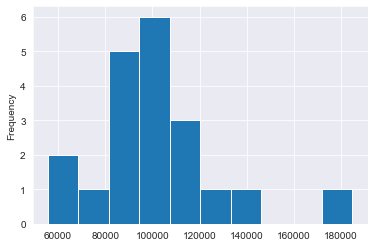

In [131]:
import seaborn as sns

sns.set_style('darkgrid')

df['ext price'].plot(kind='hist')

Here, Seaborn `hist` is showing us 8 bins with data. What if we wanted to divide our customers a different number of groups (or bins)? That’s what pandas `qcut` and `cut` are for.



Let's start with `qcut`. `qcut` is a Quantile-based discretization function. This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

Having used pandas describe function, you have already seen an example of the underlying concepts represented by `qcut`



In [132]:
df['ext price'].describe()

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: ext price, dtype: float64

Keep in mind the values for the 25%, 50% and 75% percentiles, we'll be seeing them again using `qcut`.

The simplest use of qcut is to define the number of quantiles and let pandas figure out how to divide up the data. Let's tell pandas to create 4 equal sized groupings of the data:

In [133]:
pd.qcut(df['ext price'], q=4)

0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 184793.7]]

The result is a categorical series representing the sales bins. Because we asked for quantiles with `q=4 `the bins match the percentiles from the describe function.

A common use case is to store the bin results back in the original dataframe for future analysis. So let's create 4 bins (aka quartiles) and 10 bins (aka deciles) and store the results back in the original dataframe:


In [134]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4,precision=0)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55732.0, 89138.0]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89138.0, 100272.0]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55732.0, 89138.0]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110133.0, 184794.0]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89138.0, 100272.0]","(90686.0, 95908.0]"


We can see how the bins are very different between `quantile_ex_1` and `quantile_ex_2` . We also used `precision` to define how many decimal points to use for calculating the bin precision.

The other interesting view is to see how the values are distributed across the bins using `value_counts``:

In [135]:
df['quantile_ex_1'].value_counts()

(110133.0, 184794.0]    5
(100272.0, 110133.0]    5
(89138.0, 100272.0]     5
(55732.0, 89138.0]      5
Name: quantile_ex_1, dtype: int64

In [136]:
df['quantile_ex_2'].value_counts()

(124778.0, 184794.0]    2
(112290.0, 124778.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(76471.0, 87168.0]      2
(55732.0, 76471.0]      2
Name: quantile_ex_2, dtype: int64

This illustrates a key concept. In each case, there are an equal number of observations in each bin. Pandas does the math behind the scenes to figure out how wide to make each bin. If you look closely, in `quantile_ex_1` the range of the first bin is 74,661.15 while the second bin is only 9,861.02 (110132 - 100271).

One of the challenges with this approach is that the bin labels are not very easy to explain to an end user. For instance, if we wanted to divide our customers into 5 groups (aka quintiles) like an airline frequent flier approach, we can explicitly label the bins to make them easier to interpret.

In [137]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55732.0, 89138.0]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89138.0, 100272.0]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55732.0, 89138.0]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110133.0, 184794.0]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89138.0, 100272.0]","(90686.0, 95908.0]",Silver


We just did some things a little differently. We explicitly defined the range of quantiles to use: q=[0, .2, .4, .6, .8, 1]

But we also defined the labels `labels=bin_labels_5` to use when representing the bins.

Let’s check the distribution:

In [144]:
df['quantile_ex_3'].value_counts()

Diamond     4
Platinum    4
Gold        4
Silver      4
Bronze      4
Name: quantile_ex_3, dtype: int64

In [140]:
#This should be similar

df['quantile_ex_3_2'] = pd.qcut(df['ext price'],
                              q=5,
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_3_2
0,141962,Herman LLC,63626.03,"(55732.0, 89138.0]","(55732.0, 76471.0]",Bronze,Bronze
1,146832,Kiehn-Spinka,99608.77,"(89138.0, 100272.0]","(95908.0, 100272.0]",Gold,Gold
2,163416,Purdy-Kunde,77898.21,"(55732.0, 89138.0]","(76471.0, 87168.0]",Bronze,Bronze
3,218895,Kulas Inc,137351.96,"(110133.0, 184794.0]","(124778.0, 184794.0]",Diamond,Diamond
4,239344,Stokes LLC,91535.92,"(89138.0, 100272.0]","(90686.0, 95908.0]",Silver,Silver


In [141]:
df.drop(['quantile_ex_3_2'],axis=1,inplace=True)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55732.0, 89138.0]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89138.0, 100272.0]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55732.0, 89138.0]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110133.0, 184794.0]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89138.0, 100272.0]","(90686.0, 95908.0]",Silver


We now have an equal distribution of customers across the 5 bins and the results are displayed in an easy to understand manner.

One important item to keep in mind when using `qcut` is that the quantiles must all be less than 1. Here are some examples of distributions. In most cases it’s simpler to just define `q` as an integer:

- terciles: q=[0, 1/3, 2/3, 1] or q=3
- quintiles: q=[0, .2, .4, .6, .8, 1] or q=5
- sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6

Now, how do we know what ranges are used to identify the different bins? We can use `retbins=True` to return the bin labels:

In [142]:
results, bin_edges = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

In [143]:
results

0       Bronze
1         Gold
2       Bronze
3      Diamond
4       Silver
5       Silver
6       Bronze
7     Platinum
8      Diamond
9      Diamond
10        Gold
11      Bronze
12      Silver
13      Silver
14        Gold
15     Diamond
16    Platinum
17    Platinum
18    Platinum
19        Gold
Name: ext price, dtype: category
Categories (5, object): ['Bronze' < 'Silver' < 'Gold' < 'Platinum' < 'Diamond']

In [144]:
bin_edges

array([ 55733.05 ,  87167.958,  95908.156, 103605.97 , 112290.054,
       184793.7  ])

In [159]:
bin_zipped = zip(bin_edges, bin_labels_5)
print(tuple(bin_zipped))

((55733.049999999996, 'Bronze'), (87167.95800000001, 'Silver'), (95908.15599999999, 'Gold'), (103605.97, 'Platinum'), (112290.054, 'Diamond'))


In [145]:
results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])

In [146]:
results_table

,Threshold,Tier
0,55733.050,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


Now, let's go with `cut`.

Many of the concepts we discussed above apply but there are a couple of differences with the usage of `cut`.

The major distinction is that `qcut` will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. All bins will roughly have the same number of observations but the bin range will vary.

On the other hand, `cut` is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, we can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use `cut` . We can also use `cut` to define bins that are of constant size and let pandas figure out how to define those bin edges.

Let's remove some columns to keep the examples short:

In [147]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3'])
df

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,184793.70


For the first example, we can cut the data into 4 equal bin sizes. Pandas will perform the math behind the scenes to determine how to divide the data set into these 4 groups:



In [148]:
pd.cut(df['ext price'], bins=4)

0       (55603.989, 87998.212]
1      (87998.212, 120263.375]
2       (55603.989, 87998.212]
3     (120263.375, 152528.538]
4      (87998.212, 120263.375]
5      (87998.212, 120263.375]
6       (55603.989, 87998.212]
7      (87998.212, 120263.375]
8      (87998.212, 120263.375]
9       (152528.538, 184793.7]
10     (87998.212, 120263.375]
11      (55603.989, 87998.212]
12      (55603.989, 87998.212]
13     (87998.212, 120263.375]
14     (87998.212, 120263.375]
15    (120263.375, 152528.538]
16     (87998.212, 120263.375]
17     (87998.212, 120263.375]
18     (87998.212, 120263.375]
19     (87998.212, 120263.375]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55603.989, 87998.212] < (87998.212, 120263.375] < (120263.375, 152528.538] < (152528.538, 184793.7]]

Let’s look at the distribution:

In [149]:
pd.cut(df['ext price'], bins=4).value_counts()

(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: ext price, dtype: int64

The first thing to notice is that the bin ranges are all about 32,265 but that the distribution of bin elements is not equal.

The bins have a distribution of 12, 5, 2 and 1 item(s) in each bin. This is the essential difference between `cut` and `qcut`.

Interval notation:

![Intervals](https://pbpython.com/images/Interval_notation.png)

When using `cut`, we may be defining the exact edges of our bins so it is important to understand if the edges include the values or not. Depending on the data set and specific use case, this may or may not be a big issue. It can certainly be a subtle issue we do need to consider.

To bring it into perspective, when we present the results of your analysis to others, we will need to be clear whether an account with 70,000 in sales is a silver or gold customer.

Here is an example where we want to specifically define the boundaries of our 4 bins by defining the bins parameter.

In [150]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

In [151]:
df.head()

,account number,name,ext price,cut_ex1
0,141962,Herman LLC,63626.03,silver
1,146832,Kiehn-Spinka,99608.77,gold
2,163416,Purdy-Kunde,77898.21,gold
3,218895,Kulas Inc,137351.96,diamond
4,239344,Stokes LLC,91535.92,gold


Let's make sure we understand how the `cut_bins` are being procesed when making the classification (close or open interval):

In [152]:
pd.cut(df['ext price'], bins=cut_bins)

0           (0, 70000]
1      (70000, 100000]
2      (70000, 100000]
3     (130000, 200000]
4      (70000, 100000]
5      (70000, 100000]
6      (70000, 100000]
7     (100000, 130000]
8     (100000, 130000]
9     (130000, 200000]
10     (70000, 100000]
11          (0, 70000]
12     (70000, 100000]
13     (70000, 100000]
14    (100000, 130000]
15    (100000, 130000]
16    (100000, 130000]
17    (100000, 130000]
18    (100000, 130000]
19    (100000, 130000]
Name: ext price, dtype: category
Categories (4, interval[int64]): [(0, 70000] < (70000, 100000] < (100000, 130000] < (130000, 200000]]

In [153]:
pd.cut(df['ext price'], bins=cut_bins,right=False)

0           [0, 70000)
1      [70000, 100000)
2      [70000, 100000)
3     [130000, 200000)
4      [70000, 100000)
5      [70000, 100000)
6      [70000, 100000)
7     [100000, 130000)
8     [100000, 130000)
9     [130000, 200000)
10     [70000, 100000)
11          [0, 70000)
12     [70000, 100000)
13     [70000, 100000)
14    [100000, 130000)
15    [100000, 130000)
16    [100000, 130000)
17    [100000, 130000)
18    [100000, 130000)
19    [100000, 130000)
Name: ext price, dtype: category
Categories (4, interval[int64]): [[0, 70000) < [70000, 100000) < [100000, 130000) < [130000, 200000)]

In [154]:
pd.cut(df['ext price'], bins=cut_bins,include_lowest=True)

0        (-0.001, 70000.0]
1      (70000.0, 100000.0]
2      (70000.0, 100000.0]
3     (130000.0, 200000.0]
4      (70000.0, 100000.0]
5      (70000.0, 100000.0]
6      (70000.0, 100000.0]
7     (100000.0, 130000.0]
8     (100000.0, 130000.0]
9     (130000.0, 200000.0]
10     (70000.0, 100000.0]
11       (-0.001, 70000.0]
12     (70000.0, 100000.0]
13     (70000.0, 100000.0]
14    (100000.0, 130000.0]
15    (100000.0, 130000.0]
16    (100000.0, 130000.0]
17    (100000.0, 130000.0]
18    (100000.0, 130000.0]
19    (100000.0, 130000.0]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(-0.001, 70000.0] < (70000.0, 100000.0] < (100000.0, 130000.0] < (130000.0, 200000.0]]

## String manipulation

### String object methods

Maybe refreshing some concepts you already show in the Python introductory classes, you know that you can get a list from a string by calling `split()`. This may sound basic, but it will be quite useful for some Data Science text and language processing code you'll see later on in the course:

In [171]:
string = 'this is some sentence'
string.split()

['this', 'is', 'some', 'sentence']

In [172]:
type(string.split())

list

### Vectorized string functions in pandas

[Vectorized string functions in pandas](https://pandas.pydata.org/pandas-docs/stable/text.html) are grouped within the `.str` attribute of Series and Indexes. They have the same names as the regular Python string functions, but work on Series of strings.

We saw in the previous NumPy class (and in the first Pandas class) how both modules generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements.

This is called a *vectorization* of the operations, and simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done.

Let's compare working with the array elements (for example, for capitalizing the animal names in this list):

In [155]:
animals = 'rhino giraffe molerat mantisshrimp cheetah mosquito whale'.split()
animals

['rhino', 'giraffe', 'molerat', 'mantisshrimp', 'cheetah', 'mosquito', 'whale']

Operating over the elements, *in a pythonic way*, involves using a lambda function on `map`:

In [156]:
list(map(lambda st: st.capitalize(), animals))

['Rhino', 'Giraffe', 'Molerat', 'Mantisshrimp', 'Cheetah', 'Mosquito', 'Whale']

But with vectorized operations, we can be *even more data science pythonic*!:

In [157]:
df1['animal'] = animals
df1

,data1,key,X,animal
0,0,b,2,rhino
1,1,b,2,giraffe
2,2,a,2,molerat
3,3,c,2,mantisshrimp
4,4,a,2,cheetah
5,5,a,2,mosquito
6,6,b,2,whale


In [158]:
animals_series = df1['animal']
animals_series.str

In [159]:
animals_series.str.capitalize()

0           Rhino
1         Giraffe
2         Molerat
3    Mantisshrimp
4         Cheetah
5        Mosquito
6           Whale
Name: animal, dtype: object

Now, we've just applied the `capitalize()` operation over the components of the series but by syntactically acting on the Series itself.

Let's see more examples of it:

In [160]:
len(animals_series)

7

In [161]:
animals_series.str.len()

0     5
1     7
2     7
3    12
4     7
5     8
6     5
Name: animal, dtype: int64

In [162]:
animals_series.str.count('o')

0    1
1    0
2    1
3    0
4    0
5    2
6    0
Name: animal, dtype: int64

In [163]:
animals_series.str.contains('m')

0    False
1    False
2     True
3     True
4    False
5     True
6    False
Name: animal, dtype: bool

In [165]:
df1[animals_series.str.contains('m')]

,data1,key,X,animal
2,2,a,2,molerat
3,3,c,2,mantisshrimp
5,5,a,2,mosquito


Having spaces in text information we're trying to clean up is quite common. We can perform blanks clean ups as well using vectorized operations:

In [167]:
series_with_blanks = pd.Series(['SDF    ', ' RTTR     ', 'BL   '])
series_with_blanks

0       SDF    
1     RTTR     
2         BL   
dtype: object

We can clean up the trailing blanks using `rstrip`:

In [168]:
series_with_blanks.str.rstrip()

0      SDF
1     RTTR
2       BL
dtype: object

In [170]:
prueba = series_with_blanks.str.rstrip()
prueba

0      SDF
1     RTTR
2       BL
dtype: object

In [171]:
type(prueba)

pandas.core.series.Series

In [172]:
prueba.str.len()

0    3
1    5
2    2
dtype: int64

In [173]:
prueba2 = prueba.str.lstrip()

In [174]:
prueba2

0     SDF
1    RTTR
2      BL
dtype: object

In [175]:
prueba2.str.len()

0    3
1    4
2    2
dtype: int64

In [176]:
prueba.str.lstrip().str.len()

0    3
1    4
2    2
dtype: int64

#### Exercise


Let's come back to our On Time Perfomance (OTP) dataset. To practice with the recently explained concepts, do the following:

* Generate a list of the columns that have 'Origin' in their name
* Show a sample of the values that those columns take.

In [177]:
df_otp.columns.str.contains('Origin')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [178]:
df_otp.columns[df_otp.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [179]:
df_otp[df_otp.columns[df_otp.columns.str.contains('Origin')]].sample(5)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
530890,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87
455621,13476,1347605,34922,MRY,"Monterey, CA",CA,6,California,91
201317,14112,1411206,33195,PIE,"St. Petersburg, FL",FL,12,Florida,33
334672,12191,1219102,31453,HOU,"Houston, TX",TX,48,Texas,74
157309,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93


So much redundant information! Let's jump ahead with this list of interesting columns:

```python
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number',
                      'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

flights = flights[interesting_columns]
```

# Data Aggregation and Group Operations

## GroupBy mechanics

Sometimes also called split-apply-combine for talking about group operations, a good description of the process.

- **Split**: data contained in a pandas object, whether a Series or DataFrame is split into groups based on one or more keys that you provide. The splitting is performed on a particular axis of an object. For example, a DataFrame can be grouped on its rows (axis=0) or its columns (axis=1).
- **Apply**: A function is then applied to each group, producing a new value.
- **Combine**: Finally, the results of all those function applications are combined into a result object. The form of the resulting object will usually depend on what’s being done to the data.

![Split-Apply-Combine](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Let's get started with an example:

In [180]:
np.random.seed(0)

df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278
1,a,two,0.400157,0.950088
2,b,one,0.978738,-0.151357
3,b,two,2.240893,-0.103219
4,a,one,1.867558,0.410599


The most basic split-apply-combine operation can be computed with the `groupby()` method of DataFrames and Series, passing the name of the desired key column to group by. In this case, let's practice with a Series:

In [181]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [182]:
df[['data1','key1']]

,data1,key1
0,1.764052,a
1,0.400157,a
2,0.978738,b
3,2.240893,b
4,1.867558,a


We don't get a set of Series, but a SeriesGroupBy object. 

This object is where the magic is: you can think of it as a special view of the Series, waiting to dig into the groups but doesn't actually compute anything until the aggregation is applied.

This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

Also, note that we're telling Pandas to group a Series using the criteria provided by another one (that is **not** the index of the Series we're grouping). This will be standard practice and you'll become more familiar with it as we move forward with this notebook.

Let's produce a result to see it:

In [183]:
grouped.sum()

key1
a    4.031768
b    3.219631
Name: data1, dtype: float64

As we expected, we obtain the sum of the rows that correspond to each key (`a` or `b`).

If we ask for the mean...

In [184]:
grouped.mean()

key1
a    1.343923
b    1.609816
Name: data1, dtype: float64

...what we get instead is the mean of the values of the Series (`data1`) in each of the groups (`a` and `b`).

Let's operate now on the dataframe itself:

In [185]:
df

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278
1,a,two,0.400157,0.950088
2,b,one,0.978738,-0.151357
3,b,two,2.240893,-0.103219
4,a,one,1.867558,0.410599


In [186]:
means = df.groupby(['key1','key2','data2']).mean()
means

data1
key1 key2 data2              
a    one  -0.977278  1.764052
           0.410599  1.867558
     two   0.950088  0.400157
b    one  -0.151357  0.978738
     two  -0.103219  2.240893

In [187]:
means.columns

Index(['data1'], dtype='object')

In [188]:
means.index

MultiIndex([('a', 'one',   -0.977277879876411),
            ('a', 'one',  0.41059850193837233),
            ('a', 'two',   0.9500884175255894),
            ('b', 'one',  -0.1513572082976979),
            ('b', 'two', -0.10321885179355784)],
           names=['key1', 'key2', 'data2'])

In [194]:
means.loc[('a','one',-0.977277879876411)]

data1    1.764052
Name: (a, one, -0.977277879876411), dtype: float64

In [195]:
means.loc[('a','one')]

,data1
data2,
-0.977278,1.764052
0.410599,1.867558


In [196]:
means.loc[('a')]

data1
key2 data2              
one  -0.977278  1.764052
      0.410599  1.867558
two   0.950088  0.400157

In [197]:
means.loc['a']

data1
key2 data2              
one  -0.977278  1.764052
      0.410599  1.867558
two   0.950088  0.400157

So we asked for the means considering grouping on `key1`, `key2` and `data2` and that's what we're getting for `data1`. There are no differences between original `data1` values and the mean provided because we have just 1 combination of all three different `groupby` combinations.

Let's crate a couple of arrays with data to be used by `groupby()` on the series for the `data1` column:

In [199]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.400157
            2006    0.978738
Ohio        2005    2.002473
            2006    1.867558
Name: data1, dtype: float64

You see here the same mechanism mentioned before, working in this case with Numpy arrays instead of other Series coming from the same DataFrame, but the internal dynamics are the same.

If we consolidate the computation on the grouping by asking to apply a funtion, we materialize a new dataframe with the result:

In [200]:
df

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278
1,a,two,0.400157,0.950088
2,b,one,0.978738,-0.151357
3,b,two,2.240893,-0.103219
4,a,one,1.867558,0.410599


In [201]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,1.343923,0.127803
b,1.609816,-0.127288


In this case, we got the mean values for both non-`groupby` columns (that is, `data1` and `data2`).

**Question**: Where is `key2` column? Why is it not showing up?

To better understand how `groupby()` is generating the groups, let's compare the `head()` function over the dataframe or over the `DataframeGroupBy` object:

In [202]:
df.groupby(['key1']).head(1)

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278
2,b,one,0.978738,-0.151357


What we're seeing here is the first row of each dataframe in the `groupby` group. Compare that to asking for the first row of the original dataframe:

In [203]:
df.head(1)

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278


If we ask for the first 3 rows of each dataframe in the `groupby, we will see no difference from asking the same from the original dataframe. Why?

In [204]:
df.groupby('key1').head(3)

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278
1,a,two,0.400157,0.950088
2,b,one,0.978738,-0.151357
3,b,two,2.240893,-0.103219
4,a,one,1.867558,0.410599


In [205]:
df.head()

,key1,key2,data1,data2
0,a,one,1.764052,-0.977278
1,a,two,0.400157,0.950088
2,b,one,0.978738,-0.151357
3,b,two,2.240893,-0.103219
4,a,one,1.867558,0.410599


Well, this is because although we're actually getting the first 3 rows of each dataset in the group, the ordering is the same as in the original dataset.

We should have a more clear intuition right now about how `groupby()` works. With this in mind, let's do a a new grouping by two keys now and ask to compute the mean over each group:

In [206]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   1.815805 -0.283340
     two   0.400157  0.950088
b    one   0.978738 -0.151357
     two   2.240893 -0.103219

We can ask about the size of each group as well:

In [207]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [210]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [213]:
type(df.groupby(['key1', 'key2']).size())

pandas.core.series.Series

In [214]:
pd.DataFrame(df.groupby(['key1', 'key2']).size())

0
key1 key2   
a    one   2
     two   1
b    one   1
     two   1

### Iterating over groups

We can dig up a bit on what the grouping is doing if we iterate over each of them and print it:

In [215]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.764052 -0.977278
1    a  two  0.400157  0.950088
4    a  one  1.867558  0.410599
b
  key1 key2     data1     data2
2    b  one  0.978738 -0.151357
3    b  two  2.240893 -0.103219


That was kind of easy to visualize without doing the iteration anyway. Let's do it again when we apply a multikey grouping:

In [216]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.764052 -0.977278
4    a  one  1.867558  0.410599
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.400157  0.950088
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.978738 -0.151357
('b', 'two')
  key1 key2     data1     data2
3    b  two  2.240893 -0.103219


As we mentioned before, `groupby()` generates a `DataFrameGroupBy` object:

In [260]:
df.groupby('key1')

Generating a list on it will give us access to the actual elements composing the object, that is, the groups themselves:

In [217]:
list(df.groupby('key1'))

[('a',
    key1 key2     data1     data2
  0    a  one  1.764052 -0.977278
  1    a  two  0.400157  0.950088
  4    a  one  1.867558  0.410599),
 ('b',
    key1 key2     data1     data2
  2    b  one  0.978738 -0.151357
  3    b  two  2.240893 -0.103219)]

In [218]:
type(list(df.groupby('key1'))[0][1])

pandas.core.frame.DataFrame

Now, to have this even better, let's put it in a Python dictionary and ask about one of its keys:

In [219]:
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  1.764052 -0.977278
 1    a  two  0.400157  0.950088
 4    a  one  1.867558  0.410599,
 'b':   key1 key2     data1     data2
 2    b  one  0.978738 -0.151357
 3    b  two  2.240893 -0.103219}

In [220]:
type(pieces['b'])

pandas.core.frame.DataFrame

So now we have a nicely organized structure where we can see that each member of the group is a dataset where the operation is consequently applied.

We can access the dataframe's data types with the property `dtypes`:

In [267]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

And then, we can use this property to group our dataframe, selecting the columns instead of the default axis 0. If we apply the same set of data structures transformations that we did before, we'll get the different dataframes in the group, no splitted by types:

In [221]:
grouped = df.groupby(df.dtypes, axis=1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  1.764052 -0.977278
 1  0.400157  0.950088
 2  0.978738 -0.151357
 3  2.240893 -0.103219
 4  1.867558  0.410599,
 dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### Selecting a column or subset of columns

To select a column or a subset of columns from the `DataFrameGroupBy`, just pass its name as a string if we want a `SeriesGroupBy` or as an element of a list if we want a `DataFrameGroupBy` instead:

In [222]:
df.groupby('key1')

In [223]:
df.groupby('key1')['data1']

In [224]:
df.groupby('key1')[['data2']]

You may do the same for Series, for example extracting the Serie from a Dataframe just how we saw earlier in the notebook:

> Indented block



In [225]:
type(df['data1'])

pandas.core.series.Series

In [226]:
df['data1'].groupby(df['key1'])

We asked for a `SeriesGroupBy` and this is what we got. It makes sense, because the data structure is 1-dimensional.

However, if we pass a non 1-dimensional grouper to the Series, this will not work:

In [274]:
df['data1'].groupby(df[['data1']])

ValueError: Grouper for '<class 'pandas.core.frame.DataFrame'>' not 1-dimensional

Passing a list to our original datafram will generate a new one though:

In [227]:
type(df[['data2']])

pandas.core.frame.DataFrame

...so this will accept a 2-dimensional grouper:

In [228]:
df[['data2']].groupby(df['key1'])

So wrapping up, when we materialize an operation (like the mean in this case), we obtain only the columns explicitly mentioned:

In [278]:
type(df.groupby(['key1', 'key2']))

pandas.core.groupby.generic.DataFrameGroupBy

In [229]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.283340
     two   0.950088
b    one  -0.151357
     two  -0.103219

We can do the same for Series:

In [230]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped

So applying an operation on it will materialize a Series:

In [231]:
s_grouped.mean()

key1  key2
a     one    -0.283340
      two     0.950088
b     one    -0.151357
      two    -0.103219
Name: data2, dtype: float64